## Task 1: Import packages and Load data

In [4]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
path= input('Please key in the filename: ')

Please key in the filename: /Users/quynhchou/Desktop/Jupyternotbook/Data/Sales_report/


In [5]:

frames=[]
all_length =[]
for file in os.listdir(path):
    if file.endswith('.csv'):
         filepath = path + file 
         df1 = pd.read_csv(filepath) 
         frames.append(df1)          
         result = pd.concat(frames) 

df=result
df.to_csv('annualSale2019.csv', index=False)


## Task 2: Clean and Preprocess data

### Task 2.1: Add Month Column

In [6]:
df['Month']=df['Order Date'].str.split('/').str[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [7]:
set(df['Month'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Order Date',
 nan}

### Task 2.3: Get rid of 'NaN' and 'Or' value

In [9]:
df=df.dropna(how='all')

In [10]:
df=df[df['Month']!= 'Order Date']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

In [11]:
# Caculate Sales
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each']=pd.to_numeric(df['Price Each'], downcast='float')
df['Sales']=df['Quantity Ordered']*df['Price Each']

# move Sales nexto Price Each
moving_column= df.pop('Sales')
df.insert(4,'Sales',moving_column )
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


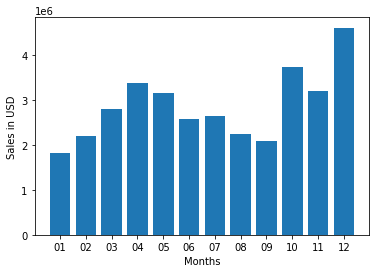

In [12]:
sale_value=df.groupby('Month').sum()['Sales']

months=[month for month in sale_value.keys()]
plt.bar(x=months, height = sale_value)
plt.xlabel('Months')
plt.ylabel('Sales in USD');

### Task 3.2: What city has the best sales?

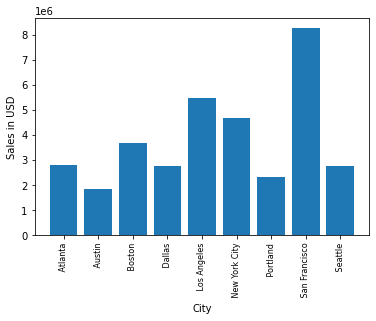

In [13]:
df['City']=df['Purchase Address'].str.split(',').str[1]
city_value=df.groupby('City').sum()['Sales']

cities=[city for city in city_value.keys() ]
plt.bar(x=cities, height= city_value)
plt.xticks(cities, rotation=90, size=8);
plt.xlabel('City')
plt.ylabel('Sales in USD');

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


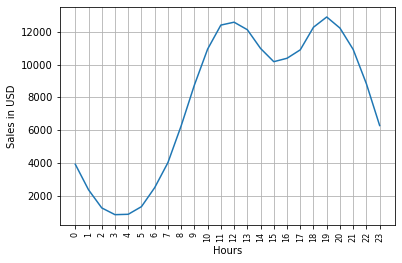

In [15]:
sales_value=df.groupby('Hours').count()['Sales']

hours=[hour for hour in sales_value.keys() ]
plt.plot(hours,sales_value)
plt.grid()
plt.xticks(hours, rotation=90, size=8);
plt.xlabel('Hours')
plt.ylabel('Sales in USD');


### Task 3.4: What products are most often sold together?

In [17]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

/var/folders/fw/0cyy0bfd5px5rndnh2fgq4pw0000gn/T/ipykernel_53050/427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

### Task 3.5: What product sold the most? Why do you think it sold the most?

/var/folders/fw/0cyy0bfd5px5rndnh2fgq4pw0000gn/T/ipykernel_53050/4030870469.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90, size=8)


Text(0, 0.5, 'Price in USD')

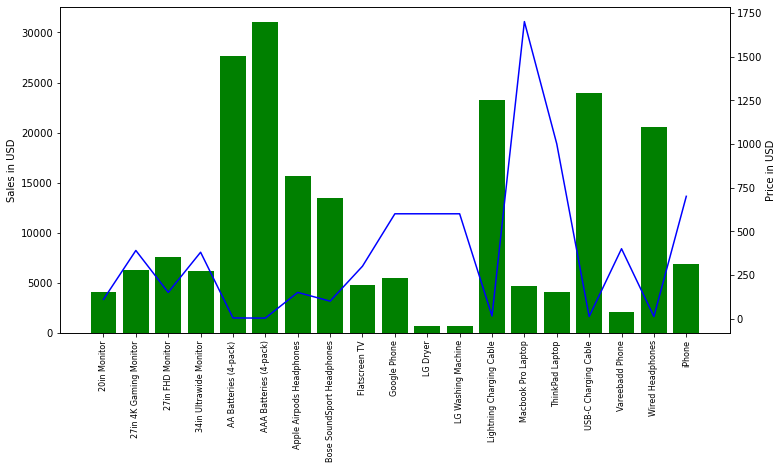

In [18]:
product_value=df.groupby('Product').sum()['Quantity Ordered']
price = df.groupby('Product').mean()['Price Each']
product_list=[product for product in product_value.keys()]

x=product_list
y1=product_value
y2= price
fig, ax1 = plt.subplots(figsize=(12,6))

ax2=ax1.twinx()

ax1.bar(x,y1,color='g')
ax2.plot(x, y2, 'b-')
ax1.set_xticklabels(x, rotation=90, size=8)
ax1.set_ylabel('Sales in USD')
ax2.set_ylabel('Price in USD')